In [1]:
# I will import all needed modules here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

In [2]:
feature_list = ['tcp_Timestamps_tcp.time_delta_0',
 'http_http.connection_0',
 'frame_frame.cap_len_0',
 'ip_ip.flags_tree_ip.flags.rb_0',
 'tcp_tcp.flags_tree_tcp.flags.str_0',
 'tcp_tcp.flags_tree_tcp.flags.fin_0',
 'tcp_tcp.seq_raw_0',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_0',
 'ip_ip.frag_offset_0',
 'ip_ip.flags_0',
 'tcp_tcp.ack_raw_0',
 'ip_ip.version_0',
 'tcp_tcp.urgent_pointer_0',
 'tcp_tcp.nxtseq_0',
 'frame_frame.time_relative_0',
 'ip_ip.checksum_0',
 'ip_ip.hdr_len_0',
 'ip_ip.flags_tree_ip.flags.mf_0',
 'tcp_tcp.flags_0',
 'tcp_tcp.stream_0',
 'ip_ip.proto_0',
 'http_http.accept_0',
 'tcp_tcp.analysis_tcp.analysis.initial_rtt_0',
 'tcp_tcp.flags_tree_tcp.flags.ece_0',
 'frame_frame.protocols_0',
 'tcp_tcp.flags_tree_tcp.flags.push_0',
 'tcp_tcp.srcport_0',
 'http_http.cookie_0',
 'tcp_tcp.flags_tree_tcp.flags.cwr_0',
 'tcp_tcp.flags_tree_tcp.flags.ack_0',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_0',
 'ip_ip.len_0',
 'tcp_tcp.window_size_value_0',
 'tcp_tcp.window_size_0',
 'tcp_tcp.ack_0',
 'http_\\r\\n_0',
 'tcp_tcp.flags_tree_tcp.flags.res_0',
 'frame_frame.time_delta_0',
 'ip_ip.ttl_0',
 'tcp_tcp.completeness_0',
 'tcp_tcp.checksum.status_0',
 'http_http.accept_language_0',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_0',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_0',
 'http_http.cache_control_0',
 'tcp_tcp.dstport_0',
 'tcp_tcp.hdr_len_0',
 'ip_ip.dsfield_0',
 'eth_eth.type_0',
 'ip_ip.checksum.status_0',
 'tcp_tcp.flags_tree_tcp.flags.reset_0',
 'tcp_tcp.checksum_0',
 'http_http.next_request_in_0',
 'tcp_tcp.flags_tree_tcp.flags.syn_0',
 'frame_frame.ignored_0',
 'tcp_tcp.len_0',
 'frame_frame.encap_type_0',
 'frame_frame.marked_0',
 'tcp_tcp.flags_tree_tcp.flags.urg_0',
 'tcp_tcp.seq_0',
 'frame_frame.offset_shift_0',
 'tcp_tcp.flags_tree_tcp.flags.ae_0',
 'tcp_Timestamps_tcp.time_relative_0',
 'tcp_tcp.window_size_scalefactor_0',
 'http_http.response_in_0',
 'ip_ip.flags_tree_ip.flags.df_0',
 'http_http.request_number_0',
 'ip_ip.id_0',
 'http_http.request_0',
 'frame_frame.len_0',
 'tcp_Timestamps_tcp.time_delta_1',
 'http_http.connection_1',
 'frame_frame.cap_len_1',
 'ip_ip.flags_tree_ip.flags.rb_1',
 'tcp_tcp.flags_tree_tcp.flags.str_1',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.message_1',
 'http_http.request_in_1',
 'tcp_tcp.flags_tree_tcp.flags.fin_1',
 'tcp_tcp.seq_raw_1',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.group_1',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_1',
 'ip_ip.frag_offset_1',
 'data_data.data_1',
 'ip_ip.flags_1',
 'http_http.location_1',
 'tcp_tcp.ack_raw_1',
 'ip_ip.version_1',
 'tcp_tcp.urgent_pointer_1',
 'tcp_tcp.nxtseq_1',
 'frame_frame.time_relative_1',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert_tcp.connection.fin_1',
 'ip_ip.checksum_1',
 'ip_ip.hdr_len_1',
 'tcp.segments_tcp.reassembled.data_1',
 'tcp_tcp.segment_data_1',
 'ip_ip.flags_tree_ip.flags.mf_1',
 'tcp_tcp.flags_1',
 'tcp_tcp.stream_1',
 'tcp.segments_tcp.segment_1',
 'data_data.len_1',
 'tcp.segments_tcp.segment.count_1',
 'http_http.content_length_header_1',
 'ip_ip.proto_1',
 'http_http.response_1',
 'http_http.accept_1',
 'http_http.content_type_1',
 'http_http.response_number_1',
 'tcp_tcp.analysis_tcp.analysis.initial_rtt_1',
 'tcp_tcp.flags_tree_tcp.flags.ece_1',
 'frame_frame.protocols_1',
 'tcp_tcp.flags_tree_tcp.flags.push_1',
 'tcp_tcp.srcport_1',
 'tcp_tcp.flags_tree_tcp.flags.cwr_1',
 'tcp_tcp.flags_tree_tcp.flags.ack_1',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.group_1',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_1',
 'ip_ip.len_1',
 'tcp_tcp.window_size_value_1',
 'tcp_tcp.window_size_1',
 'tcp_tcp.ack_1',
 'http_\\r\\n_1',
 'http_http.date_1',
 'tcp_tcp.flags_tree_tcp.flags.res_1',
 'frame_frame.time_delta_1',
 'ip_ip.ttl_1',
 'tcp_tcp.completeness_1',
 'tcp_tcp.checksum.status_1',
 'http_http.accept_language_1',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_1',
 'http_http.transfer_encoding_1',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_1',
 'http_http.cache_control_1',
 'tcp_tcp.dstport_1',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.severity_1',
 'tcp_tcp.hdr_len_1',
 'ip_ip.dsfield_1',
 'eth_eth.type_1',
 'ip_ip.checksum.status_1',
 'http_http.file_data_1',
 'http_http.accept_encoding_1',
 'http_http.content_length_header_tree_http.content_length_1',
 'tcp_tcp.flags_tree_tcp.flags.reset_1',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.severity_1',
 'tcp_tcp.checksum_1',
 'http_http.next_request_in_1',
 'tcp_tcp.flags_tree_tcp.flags.syn_1',
 'frame_frame.ignored_1',
 'http_http.time_1',
 'tcp_tcp.len_1',
 'frame_frame.encap_type_1',
 'frame_frame.marked_1',
 'tcp_tcp.flags_tree_tcp.flags.urg_1',
 'tcp_tcp.seq_1',
 'frame_frame.offset_shift_1',
 'tcp_tcp.flags_tree_tcp.flags.ae_1',
 'tcp.segments_tcp.reassembled.length_1',
 'tcp_Timestamps_tcp.time_relative_1',
 'tcp_tcp.window_size_scalefactor_1',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert_tcp.connection.fin_active_1',
 'http_http.response_in_1',
 'ip_ip.flags_tree_ip.flags.df_1',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.message_1',
 'http_http.request_number_1',
 'http_http.response.line_1',
 'ip_ip.id_1',
 'http_http.next_response_in_1',
 'http_http.request_1',
 'http_http.server_1',
 'frame_frame.len_1',
 'tcp_Timestamps_tcp.time_delta_2',
 'http_http.connection_2',
 'frame_frame.cap_len_2',
 'ip_ip.flags_tree_ip.flags.rb_2',
 'tcp_tcp.flags_tree_tcp.flags.str_2',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.message_2',
 'http_http.request_in_2',
 'tcp_tcp.flags_tree_tcp.flags.fin_2',
 'tcp_tcp.seq_raw_2',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.group_2',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_2',
 'ip_ip.frag_offset_2',
 'ip_ip.flags_2',
 'tcp_tcp.ack_raw_2',
 'ip_ip.version_2',
 'tcp_tcp.urgent_pointer_2',
 'tcp_tcp.nxtseq_2',
 'frame_frame.time_relative_2',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert_tcp.connection.fin_2',
 'ip_ip.checksum_2',
 'ip_ip.hdr_len_2',
 'tcp.segments_tcp.reassembled.data_2',
 'tcp_tcp.segment_data_2',
 'ip_ip.flags_tree_ip.flags.mf_2',
 'tcp_tcp.flags_2',
 'tcp_tcp.stream_2',
 'tcp.segments_tcp.segment_2',
 'tcp.segments_tcp.segment.count_2',
 'ip_ip.proto_2',
 'http_http.response_2',
 'http_http.accept_2',
 'http_http.content_type_2',
 'http_http.response_number_2',
 'http_http.content_encoding_2',
 'tcp_tcp.analysis_tcp.analysis.initial_rtt_2',
 'tcp_tcp.flags_tree_tcp.flags.ece_2',
 'frame_frame.protocols_2',
 'tcp_tcp.flags_tree_tcp.flags.push_2',
 'tcp_tcp.srcport_2',
 'tcp_tcp.flags_tree_tcp.flags.cwr_2',
 'tcp_tcp.flags_tree_tcp.flags.ack_2',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.group_2',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_2',
 'tcp_tcp.analysis_tcp.analysis.ack_rtt_2',
 'ip_ip.len_2',
 'tcp_tcp.window_size_value_2',
 'tcp_tcp.window_size_2',
 'tcp_tcp.ack_2',
 'http_\\r\\n_2',
 'http_http.date_2',
 'tcp_tcp.flags_tree_tcp.flags.res_2',
 'frame_frame.time_delta_2',
 'ip_ip.ttl_2',
 'tcp_tcp.completeness_2',
 'tcp_tcp.checksum.status_2',
 'http_http.accept_language_2',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_2',
 'http_http.transfer_encoding_2',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_2',
 'http_http.cache_control_2',
 'tcp_tcp.dstport_2',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.severity_2',
 'http_Content-encoded entity body (gzip): 195659 bytes -> 258248 bytes_2',
 'tcp_tcp.hdr_len_2',
 'ip_ip.dsfield_2',
 'eth_eth.type_2',
 'ip_ip.checksum.status_2',
 'http_http.file_data_2',
 'http_http.accept_encoding_2',
 'tcp_tcp.flags_tree_tcp.flags.reset_2',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.severity_2',
 'tcp_tcp.checksum_2',
 'http_http.next_request_in_2',
 'tcp_tcp.flags_tree_tcp.flags.syn_2',
 'frame_frame.ignored_2',
 'http_http.time_2',
 'tcp_tcp.len_2',
 'frame_frame.encap_type_2',
 'frame_frame.marked_2',
 'tcp_tcp.flags_tree_tcp.flags.urg_2',
 'tcp_tcp.seq_2',
 'frame_frame.offset_shift_2',
 'tcp_tcp.flags_tree_tcp.flags.ae_2',
 'tcp.segments_tcp.reassembled.length_2',
 'tcp_Timestamps_tcp.time_relative_2',
 'tcp_tcp.window_size_scalefactor_2',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert_tcp.connection.fin_active_2',
 'http_http.response_in_2',
 'ip_ip.flags_tree_ip.flags.df_2',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.message_2',
 'tcp_tcp.analysis_tcp.analysis.acks_frame_2',
 'http_http.prev_request_in_2',
 'http_http.request_number_2',
 'http_http.response.line_2',
 'ip_ip.id_2',
 'http_http.request_2',
 'http_http.server_2',
 'frame_frame.len_2',
 'tcp_Timestamps_tcp.time_delta_3',
 'http_http.connection_3',
 'frame_frame.cap_len_3',
 'ip_ip.flags_tree_ip.flags.rb_3',
 'tcp_tcp.flags_tree_tcp.flags.str_3',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.message_3',
 'http_http.request_in_3',
 'tcp_tcp.flags_tree_tcp.flags.fin_3',
 'tcp_tcp.seq_raw_3',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.group_3',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_3',
 'ip_ip.frag_offset_3',
 'http_data_data.data_3',
 'data_data.data_3',
 'ip_ip.flags_3',
 'tcp_tcp.ack_raw_3',
 'ip_ip.version_3',
 'tcp_tcp.urgent_pointer_3',
 'tcp_tcp.nxtseq_3',
 'http_http.prev_response_in_3',
 'frame_frame.time_relative_3',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert_tcp.connection.fin_3',
 'ip_ip.checksum_3',
 'ip_ip.hdr_len_3',
 'tcp.segments_tcp.reassembled.data_3',
 'tcp_tcp.segment_data_3',
 'ip_ip.flags_tree_ip.flags.mf_3',
 'tcp_tcp.flags_3',
 'tcp_tcp.stream_3',
 'tcp.segments_tcp.segment_3',
 'data_data.len_3',
 'tcp.segments_tcp.segment.count_3',
 'http_http.content_length_header_3',
 'ip_ip.proto_3',
 'http_http.response_3',
 'http_http.accept_3',
 'http_http.content_type_3',
 'http_http.response_number_3',
 'tcp_tcp.analysis_tcp.analysis.initial_rtt_3',
 'tcp_tcp.flags_tree_tcp.flags.ece_3',
 'frame_frame.protocols_3',
 'tcp_tcp.flags_tree_tcp.flags.push_3',
 'tcp_tcp.srcport_3',
 'tcp_tcp.flags_tree_tcp.flags.cwr_3',
 'tcp_tcp.flags_tree_tcp.flags.ack_3',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.group_3',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_3',
 'ip_ip.len_3',
 'tcp_tcp.window_size_value_3',
 'tcp_tcp.window_size_3',
 'tcp_tcp.ack_3',
 'http_\\r\\n_3',
 'http_data_data.len_3',
 'http_http.date_3',
 'tcp_tcp.flags_tree_tcp.flags.res_3',
 'frame_frame.time_delta_3',
 'ip_ip.ttl_3',
 'tcp_tcp.completeness_3',
 'tcp_tcp.checksum.status_3',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_3',
 'http_http.last_modified_3',
 'http_http.transfer_encoding_3',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_3',
 'http_http.cache_control_3',
 'tcp_tcp.dstport_3',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.severity_3',
 'tcp_tcp.hdr_len_3',
 'ip_ip.dsfield_3',
 'eth_eth.type_3',
 'ip_ip.checksum.status_3',
 'http_http.file_data_3',
 'http_http.accept_encoding_3',
 'http_http.content_length_header_tree_http.content_length_3',
 'tcp_tcp.flags_tree_tcp.flags.reset_3',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.severity_3',
 'tcp_tcp.checksum_3',
 'http_http.next_request_in_3',
 'tcp_tcp.flags_tree_tcp.flags.syn_3',
 'frame_frame.ignored_3',
 'http_http.time_3',
 'tcp_tcp.len_3',
 'frame_frame.encap_type_3',
 'frame_frame.marked_3',
 'tcp_tcp.flags_tree_tcp.flags.urg_3',
 'tcp_tcp.seq_3',
 'frame_frame.offset_shift_3',
 'tcp_tcp.flags_tree_tcp.flags.ae_3',
 'tcp.segments_tcp.reassembled.length_3',
 'http_http.set_cookie_3',
 'tcp_Timestamps_tcp.time_relative_3',
 'tcp_tcp.window_size_scalefactor_3',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert_tcp.connection.fin_active_3',
 'http_http.response_in_3',
 'ip_ip.flags_tree_ip.flags.df_3',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.message_3',
 'http_http.prev_request_in_3',
 'http_http.request_number_3',
 'http_http.response.line_3',
 'ip_ip.id_3',
 'http_http.next_response_in_3',
 'http_http.request_3',
 'http_http.server_3',
 'frame_frame.len_3',
 'tcp_Timestamps_tcp.time_delta_4',
 'http_http.connection_4',
 'frame_frame.cap_len_4',
 'ip_ip.flags_tree_ip.flags.rb_4',
 'tcp_tcp.flags_tree_tcp.flags.str_4',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.message_4',
 'http_http.request_in_4',
 'tcp_tcp.flags_tree_tcp.flags.fin_4',
 'tcp_tcp.seq_raw_4',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.group_4',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_4',
 'ip_ip.frag_offset_4',
 'http_Content-encoded entity body (gzip): 106 bytes -> 146 bytes_4',
 'ip_ip.flags_4',
 'tcp_tcp.ack_raw_4',
 'ip_ip.version_4',
 'tcp_tcp.urgent_pointer_4',
 'tcp_tcp.nxtseq_4',
 'frame_frame.time_relative_4',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert_tcp.connection.fin_4',
 'ip_ip.checksum_4',
 'ip_ip.hdr_len_4',
 'ip_ip.flags_tree_ip.flags.mf_4',
 'tcp_tcp.flags_4',
 'tcp_tcp.stream_4',
 'ip_ip.proto_4',
 'http_http.response_4',
 'http_http.accept_4',
 'http_http.content_type_4',
 'http_http.response_number_4',
 'http_http.content_encoding_4',
 'tcp_tcp.analysis_tcp.analysis.initial_rtt_4',
 'tcp_tcp.flags_tree_tcp.flags.ece_4',
 'frame_frame.protocols_4',
 'tcp_tcp.flags_tree_tcp.flags.push_4',
 'tcp_tcp.srcport_4',
 'http_http.cookie_4',
 'tcp_tcp.flags_tree_tcp.flags.cwr_4',
 'tcp_tcp.flags_tree_tcp.flags.ack_4',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.group_4',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_4',
 'ip_ip.len_4',
 'tcp_tcp.window_size_value_4',
 'tcp_tcp.window_size_4',
 'tcp_tcp.ack_4',
 'http_\\r\\n_4',
 'http_http.date_4',
 'tcp_tcp.flags_tree_tcp.flags.res_4',
 'frame_frame.time_delta_4',
 'ip_ip.ttl_4',
 'tcp_tcp.completeness_4',
 'tcp_tcp.checksum.status_4',
 'http_http.accept_language_4',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_4',
 'http_http.transfer_encoding_4',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_4',
 'http_http.cache_control_4',
 'tcp_tcp.dstport_4',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.severity_4',
 'tcp_tcp.hdr_len_4',
 'ip_ip.dsfield_4',
 'eth_eth.type_4',
 'ip_ip.checksum.status_4',
 'http_http.file_data_4',
 'http_http.accept_encoding_4',
 'tcp_tcp.flags_tree_tcp.flags.reset_4',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.severity_4',
 'tcp_tcp.checksum_4',
 'http_http.next_request_in_4',
 'tcp_tcp.flags_tree_tcp.flags.syn_4',
 'frame_frame.ignored_4',
 'http_http.time_4',
 'tcp_tcp.len_4',
 'frame_frame.encap_type_4',
 'frame_frame.marked_4',
 'tcp_tcp.flags_tree_tcp.flags.urg_4',
 'tcp_tcp.seq_4',
 'frame_frame.offset_shift_4',
 'tcp_tcp.flags_tree_tcp.flags.ae_4',
 'tcp_Timestamps_tcp.time_relative_4',
 'tcp_tcp.window_size_scalefactor_4',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert_tcp.connection.fin_active_4',
 'http_http.response_in_4',
 'ip_ip.flags_tree_ip.flags.df_4',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.message_4',
 'http_http.prev_request_in_4',
 'http_http.request_number_4',
 'http_http.response.line_4',
 'ip_ip.id_4',
 'http_http.request_4',
 'http_http.server_4',
 'frame_frame.len_4',
 'tcp_Timestamps_tcp.time_delta_5',
 'http_http.connection_5',
 'frame_frame.cap_len_5',
 'ip_ip.flags_tree_ip.flags.rb_5',
 'tcp_tcp.flags_tree_tcp.flags.str_5',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.message_5',
 'http_http.request_in_5',
 'tcp_tcp.flags_tree_tcp.flags.fin_5',
 'tcp_tcp.seq_raw_5',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.group_5',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_5',
 'ip_ip.frag_offset_5',
 'http_data_data.data_5',
 'data_data.data_5',
 'ip_ip.flags_5',
 'tcp_tcp.analysis_tcp.analysis.flags__ws.expert__ws.expert.group_5',
 'tcp_tcp.ack_raw_5',
 'ip_ip.version_5',
 'tcp_tcp.urgent_pointer_5',
 'tcp_tcp.nxtseq_5',
 'http_http.prev_response_in_5',
 'frame_frame.time_relative_5',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert_tcp.connection.fin_5',
 'ip_ip.checksum_5',
 'ip_ip.hdr_len_5',
 'tcp.segments_tcp.reassembled.data_5',
 'tcp_tcp.segment_data_5',
 'ip_ip.flags_tree_ip.flags.mf_5',
 'tcp_tcp.flags_5',
 'tcp_tcp.stream_5',
 'tcp.segments_tcp.segment_5',
 'data_data.len_5',
 'tcp.segments_tcp.segment.count_5',
 'http_http.content_length_header_5',
 'ip_ip.proto_5',
 'http_http.response_5',
 'http_http.accept_5',
 'http_http.content_type_5',
 'http_http.response_number_5',
 'tcp_tcp.analysis_tcp.analysis.flags__ws.expert__ws.expert.message_5',
 'tcp_tcp.analysis_tcp.analysis.initial_rtt_5',
 'tcp_tcp.flags_tree_tcp.flags.ece_5',
 'frame_frame.protocols_5',
 'tcp_tcp.flags_tree_tcp.flags.push_5',
 'tcp_tcp.srcport_5',
 'tcp_tcp.flags_tree_tcp.flags.cwr_5',
 'tcp_tcp.flags_tree_tcp.flags.ack_5',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.group_5',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_5',
 'ip_ip.len_5',
 'tcp_tcp.window_size_value_5',
 'tcp_tcp.window_size_5',
 'tcp_tcp.ack_5',
 'http_\\r\\n_5',
 'http_data_data.len_5',
 'http_http.date_5',
 'tcp_tcp.flags_tree_tcp.flags.res_5',
 'frame_frame.time_delta_5',
 'ip_ip.ttl_5',
 'tcp_tcp.completeness_5',
 'tcp_tcp.checksum.status_5',
 'http_http.last_modified_5',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_5',
 'http_http.accept_language_5',
 'tcp_tcp.analysis_tcp.analysis.flags__ws.expert_tcp.analysis.lost_segment_5',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_5',
 'http_http.cache_control_5',
 'tcp_tcp.dstport_5',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.severity_5',
 'tcp_tcp.hdr_len_5',
 'ip_ip.dsfield_5',
 'eth_eth.type_5',
 'ip_ip.checksum.status_5',
 'http_http.file_data_5',
 'http_http.accept_encoding_5',
 'http_http.content_length_header_tree_http.content_length_5',
 'tcp_tcp.flags_tree_tcp.flags.reset_5',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert__ws.expert.severity_5',
 'tcp_tcp.checksum_5',
 'http_http.next_request_in_5',
 'tcp_tcp.flags_tree_tcp.flags.syn_5',
 'frame_frame.ignored_5',
 'http_http.time_5',
 'tcp_tcp.len_5',
 'frame_frame.encap_type_5',
 'frame_frame.marked_5',
 'tcp_tcp.flags_tree_tcp.flags.urg_5',
 'tcp_tcp.analysis_tcp.analysis.flags__ws.expert__ws.expert.severity_5',
 'tcp_tcp.seq_5',
 'frame_frame.offset_shift_5',
 'tcp_tcp.flags_tree_tcp.flags.ae_5',
 'tcp.segments_tcp.reassembled.length_5',
 'tcp_Timestamps_tcp.time_relative_5',
 'tcp_tcp.window_size_scalefactor_5',
 'media_media.type_5',
 'tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expert_tcp.connection.fin_active_5',
 'ip_ip.flags_tree_ip.flags.df_5',
 'tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.message_5',
 'http_http.prev_request_in_5',
 'http_http.request_number_5',
 'http_http.response.line_5',
 'ip_ip.id_5',
 'http_http.next_response_in_5',
 'http_http.request_5',
 'http_http.server_5',
 'frame_frame.len_5',
 'malware']

In [3]:
USNIF_raw_data_df = pd.read_csv('USNIF_only_data_set.csv')
USNIF_raw_data_df['malware'] = 1
USNIF_raw_data_df= USNIF_raw_data_df[feature_list].fillna(0)

In [4]:
# # Rename colume 
# key_remove_cols = ['ip_ip.src', 
# 'http_HTTP/1.1', 
# 'eth_eth.dst', 'http_http.host', 'http_http.request.full_uri',
# 'eth_eth.src', 'http_HTTP ', 'http_ [truncated]', 'http_GET ', 'data-text-lines_', 'ip_ip.dst',
#  'http_http.response_for.uri', 'frame_frame.number', 'http_http.user_agent', 'frame_frame.time_epoch'] 
# for key in key_remove_cols:
#     remove_cols = []
#     for col in list(USNIF_raw_data_df.columns):
#         col = str(col)
#         if key in col:
#             remove_cols.append(col)
#     for col in remove_cols:
#         USNIF_raw_data_df = USNIF_raw_data_df.drop([col], axis=1)

# USNIF_raw_data_df.to_csv('USNIF_only_data_filted.csv', index=False)
# USNIF_raw_data_df.shape

# list(USNIF_raw_data_df.columns)

['tcp_Timestamps_tcp.time_delta_0',
 'http_http.connection_0',
 'frame_frame.cap_len_0',
 'ip_ip.flags_tree_ip.flags.rb_0',
 'tcp_tcp.flags_tree_tcp.flags.str_0',
 'tcp_tcp.flags_tree_tcp.flags.fin_0',
 'tcp_tcp.seq_raw_0',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_0',
 'ip_ip.frag_offset_0',
 'ip_ip.flags_0',
 'tcp_tcp.ack_raw_0',
 'ip_ip.version_0',
 'tcp_tcp.urgent_pointer_0',
 'tcp_tcp.nxtseq_0',
 'frame_frame.time_relative_0',
 'ip_ip.checksum_0',
 'ip_ip.hdr_len_0',
 'ip_ip.flags_tree_ip.flags.mf_0',
 'tcp_tcp.flags_0',
 'tcp_tcp.stream_0',
 'ip_ip.proto_0',
 'http_http.accept_0',
 'tcp_tcp.analysis_tcp.analysis.initial_rtt_0',
 'tcp_tcp.flags_tree_tcp.flags.ece_0',
 'frame_frame.protocols_0',
 'tcp_tcp.flags_tree_tcp.flags.push_0',
 'tcp_tcp.srcport_0',
 'http_http.cookie_0',
 'tcp_tcp.flags_tree_tcp.flags.cwr_0',
 'tcp_tcp.flags_tree_tcp.flags.ack_0',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_0',
 'ip_ip.len_0',
 'tcp_tcp.window_size_value_0',
 'tcp_tcp.window_size_

In [5]:
USNIF_noraml_raw_data_df = pd.read_csv('normal_USNIF_only_data_set.csv')
USNIF_noraml_raw_data_df['malware'] = 0
USNIF_noraml_raw_data_df = USNIF_noraml_raw_data_df[feature_list].fillna(0)

In [6]:
mixed_USNIF_df = pd.concat([USNIF_raw_data_df, USNIF_noraml_raw_data_df])
mixed_USNIF_df

,tcp_Timestamps_tcp.time_delta_0,http_http.connection_0,frame_frame.cap_len_0,ip_ip.flags_tree_ip.flags.rb_0,tcp_tcp.flags_tree_tcp.flags.str_0,tcp_tcp.flags_tree_tcp.flags.fin_0,tcp_tcp.seq_raw_0,tcp_tcp.analysis_tcp.analysis.bytes_in_flight_0,ip_ip.frag_offset_0,ip_ip.flags_0,...,tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.message_5,http_http.prev_request_in_5,http_http.request_number_5,http_http.response.line_5,ip_ip.id_5,http_http.next_response_in_5,http_http.request_5,http_http.server_5,frame_frame.len_5,malware
0,0.000444,15.0,500.0,0.0,6.0,0.0,4.015886e+09,446.0,0.0,2.0,...,0.0,63.0,0.0,69.0,30516.0,73.0,0.0,50.0,883.0,1
1,0.000241,29.0,354.0,0.0,6.0,0.0,1.879683e+08,300.0,0.0,2.0,...,0.0,110.0,0.0,69.0,55004.0,116.0,0.0,50.0,363.0,1
2,0.001482,29.0,346.0,0.0,6.0,0.0,2.035990e+09,292.0,0.0,2.0,...,0.0,139.0,0.0,69.0,8674.0,0.0,0.0,50.0,363.0,1
3,0.000275,29.0,346.0,0.0,6.0,0.0,3.759511e+09,292.0,0.0,2.0,...,0.0,169.0,0.0,69.0,4501.0,0.0,0.0,50.0,355.0,1
4,0.000381,29.0,1415.0,0.0,6.0,0.0,2.215290e+09,1361.0,0.0,2.0,...,0.0,200.0,0.0,69.0,53413.0,0.0,0.0,50.0,291.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.000000,15.0,59.0,0.0,6.0,0.0,2.647171e+09,369.0,0.0,2.0,...,0.0,0.0,1.0,0.0,170.0,0.0,1.0,0.0,536.0,0
464,0.007822,15.0,1277.0,0.0,6.0,0.0,3.846740e+09,1223.0,0.0,2.0,...,0.0,0.0,1.0,0.0,41129.0,0.0,1.0,0.0,524.0,0
465,0.139800,92.0,170.0,0.0,317.0,1.0,1.394858e+09,116.0,0.0,2.0,...,0.0,0.0,1.0,0.0,36956.0,0.0,1.0,0.0,533.0,0
466,0.074839,15.0,415.0,0.0,6.0,0.0,1.373886e+09,361.0,0.0,2.0,...,0.0,0.0,1.0,0.0,45033.0,0.0,1.0,0.0,530.0,0


In [7]:
mixed_one_to_one_USNIF_df = pd.concat([USNIF_raw_data_df, USNIF_noraml_raw_data_df.sample(n = USNIF_raw_data_df.shape[0])])
mixed_one_to_one_USNIF_df

,tcp_Timestamps_tcp.time_delta_0,http_http.connection_0,frame_frame.cap_len_0,ip_ip.flags_tree_ip.flags.rb_0,tcp_tcp.flags_tree_tcp.flags.str_0,tcp_tcp.flags_tree_tcp.flags.fin_0,tcp_tcp.seq_raw_0,tcp_tcp.analysis_tcp.analysis.bytes_in_flight_0,ip_ip.frag_offset_0,ip_ip.flags_0,...,tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.message_5,http_http.prev_request_in_5,http_http.request_number_5,http_http.response.line_5,ip_ip.id_5,http_http.next_response_in_5,http_http.request_5,http_http.server_5,frame_frame.len_5,malware
0,0.000444,15.0,500.0,0.0,6.0,0.0,4.015886e+09,446.0,0.0,2.0,...,0.0,63.0,0.0,69.0,30516.0,73.0,0.0,50.0,883.0,1
1,0.000241,29.0,354.0,0.0,6.0,0.0,1.879683e+08,300.0,0.0,2.0,...,0.0,110.0,0.0,69.0,55004.0,116.0,0.0,50.0,363.0,1
2,0.001482,29.0,346.0,0.0,6.0,0.0,2.035990e+09,292.0,0.0,2.0,...,0.0,139.0,0.0,69.0,8674.0,0.0,0.0,50.0,363.0,1
3,0.000275,29.0,346.0,0.0,6.0,0.0,3.759511e+09,292.0,0.0,2.0,...,0.0,169.0,0.0,69.0,4501.0,0.0,0.0,50.0,355.0,1
4,0.000381,29.0,1415.0,0.0,6.0,0.0,2.215290e+09,1361.0,0.0,2.0,...,0.0,200.0,0.0,69.0,53413.0,0.0,0.0,50.0,291.0,1
5,0.000578,29.0,563.0,0.0,6.0,0.0,3.470995e+09,509.0,0.0,2.0,...,0.0,233.0,0.0,69.0,38245.0,0.0,0.0,50.0,315.0,1
6,0.000887,29.0,645.0,0.0,6.0,0.0,4.028343e+09,591.0,0.0,2.0,...,0.0,0.0,0.0,0.0,20628.0,0.0,0.0,0.0,453.0,1
7,0.000306,29.0,623.0,0.0,6.0,0.0,4.251871e+09,569.0,0.0,2.0,...,0.0,302.0,0.0,69.0,59412.0,0.0,0.0,50.0,255.0,1
8,0.000587,29.0,532.0,0.0,6.0,0.0,3.018432e+09,478.0,0.0,2.0,...,0.0,0.0,1.0,0.0,46592.0,0.0,1.0,0.0,681.0,1
9,0.000819,29.0,617.0,0.0,6.0,0.0,2.417291e+09,563.0,0.0,2.0,...,82.0,0.0,0.0,352.0,57865.0,0.0,0.0,320.0,971.0,1


In [8]:

mixed_USNIF_corr_df = mixed_USNIF_df.corr()
mixed_one_to_one_USNIF_corr_df = mixed_one_to_one_USNIF_df.corr()

In [9]:
mixed_USNIF_corr_df

,tcp_Timestamps_tcp.time_delta_0,http_http.connection_0,frame_frame.cap_len_0,ip_ip.flags_tree_ip.flags.rb_0,tcp_tcp.flags_tree_tcp.flags.str_0,tcp_tcp.flags_tree_tcp.flags.fin_0,tcp_tcp.seq_raw_0,tcp_tcp.analysis_tcp.analysis.bytes_in_flight_0,ip_ip.frag_offset_0,ip_ip.flags_0,...,tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.message_5,http_http.prev_request_in_5,http_http.request_number_5,http_http.response.line_5,ip_ip.id_5,http_http.next_response_in_5,http_http.request_5,http_http.server_5,frame_frame.len_5,malware
tcp_Timestamps_tcp.time_delta_0,1.000000,-0.072042,-0.043250,NaN,-0.026965,-0.021276,-0.044730,-0.045121,NaN,0.048451,...,-0.015851,-0.039243,-0.055182,-0.004183,0.011950,0.003846,0.033883,-0.031638,-0.027429,-0.025263
http_http.connection_0,-0.072042,1.000000,0.001167,NaN,0.070290,0.272569,0.067812,0.003103,NaN,-0.003763,...,-0.007122,-0.114028,-0.119968,-0.004506,-0.025581,-0.029410,-0.063787,0.008586,-0.009719,0.065308
frame_frame.cap_len_0,-0.043250,0.001167,1.000000,NaN,0.168803,-0.009451,-0.039374,0.217032,NaN,0.014070,...,-0.018127,0.189110,0.034036,0.105900,0.010544,0.023187,0.022545,0.087231,0.072306,0.007083
ip_ip.flags_tree_ip.flags.rb_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tcp_tcp.flags_tree_tcp.flags.str_0,-0.026965,0.070290,0.168803,NaN,1.000000,0.445863,-0.068383,-0.014817,NaN,-0.006513,...,0.189516,-0.094098,-0.061632,-0.068683,-0.043478,-0.081332,0.036250,-0.074495,0.083593,-0.027167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http_http.next_response_in_5,0.003846,-0.029410,0.023187,NaN,-0.081332,-0.070366,-0.017825,0.097785,NaN,0.075529,...,-0.051693,0.310171,-0.246658,0.214037,0.179226,1.000000,-0.446682,0.392857,0.196348,-0.069300
http_http.request_5,0.033883,-0.063787,0.022545,NaN,0.036250,0.073875,-0.130448,0.083490,NaN,-0.046266,...,-0.072055,0.105331,0.552200,-0.435117,-0.134125,-0.446682,1.000000,-0.456508,-0.196693,-0.121320
http_http.server_5,-0.031638,0.008586,0.087231,NaN,-0.074495,-0.031052,0.053223,0.089768,NaN,-0.114985,...,-0.045575,0.072816,-0.252084,0.712595,-0.119426,0.392857,-0.456508,1.000000,0.096264,-0.066359
frame_frame.len_5,-0.027429,-0.009719,0.072306,NaN,0.083593,-0.015567,0.035267,0.035014,NaN,-0.028618,...,-0.085952,-0.001640,-0.241920,0.018774,-0.045850,0.196348,-0.196693,0.096264,1.000000,-0.042979


In [10]:
mixed_one_to_one_USNIF_corr_df

,tcp_Timestamps_tcp.time_delta_0,http_http.connection_0,frame_frame.cap_len_0,ip_ip.flags_tree_ip.flags.rb_0,tcp_tcp.flags_tree_tcp.flags.str_0,tcp_tcp.flags_tree_tcp.flags.fin_0,tcp_tcp.seq_raw_0,tcp_tcp.analysis_tcp.analysis.bytes_in_flight_0,ip_ip.frag_offset_0,ip_ip.flags_0,...,tcp_tcp.flags_tree_tcp.flags.fin_tree__ws.expert__ws.expert.message_5,http_http.prev_request_in_5,http_http.request_number_5,http_http.response.line_5,ip_ip.id_5,http_http.next_response_in_5,http_http.request_5,http_http.server_5,frame_frame.len_5,malware
tcp_Timestamps_tcp.time_delta_0,1.000000,-0.102141,0.136635,NaN,NaN,NaN,-0.391945,0.043615,NaN,NaN,...,-0.100135,0.858694,0.303354,-0.098762,-0.014111,0.576898,0.171841,-0.121477,0.171376,-0.317776
http_http.connection_0,-0.102141,1.000000,-0.239196,NaN,NaN,NaN,0.141850,-0.208191,NaN,NaN,...,-0.058120,-0.133100,-0.131174,-0.066211,-0.245926,-0.075310,-0.092996,-0.093317,-0.036576,-0.196853
frame_frame.cap_len_0,0.136635,-0.239196,1.000000,NaN,NaN,NaN,-0.475438,0.871880,NaN,NaN,...,-0.184111,0.231456,-0.163767,0.420792,0.268782,0.341936,-0.160229,0.588444,-0.151356,-0.137793
ip_ip.flags_tree_ip.flags.rb_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tcp_tcp.flags_tree_tcp.flags.str_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http_http.next_response_in_5,0.576898,-0.075310,0.341936,NaN,NaN,NaN,-0.422745,0.494859,NaN,NaN,...,-0.118588,0.772781,-0.156768,-0.085564,0.292738,1.000000,-0.203377,0.224882,-0.137215,-0.369133
http_http.request_5,0.171841,-0.092996,-0.160229,NaN,NaN,NaN,-0.031966,-0.098120,NaN,NaN,...,-0.171499,0.159382,0.770827,-0.214288,-0.319308,-0.203377,1.000000,-0.250067,0.061935,-0.325396
http_http.server_5,-0.121477,-0.093317,0.588444,NaN,NaN,NaN,-0.482874,0.626769,NaN,NaN,...,-0.099569,0.079479,-0.192759,0.841725,0.110985,0.224882,-0.250067,1.000000,-0.083859,-0.419972
frame_frame.len_5,0.171376,-0.036576,-0.151356,NaN,NaN,NaN,0.075673,-0.320362,NaN,NaN,...,0.190228,-0.064737,-0.005664,0.155221,-0.087265,-0.137215,0.061935,-0.083859,1.000000,0.082372


# Use corrlations to find the useful fields 

In [11]:

# the chat take too long time to build, so comment it for now
# plt.figure(figsize = (20,20))
# sns.heatmap(mixed_USNIF_corr_df, annot=True)

In [12]:
mixed_USNIF_corr_df = mixed_USNIF_corr_df.loc[['malware'],:].fillna(0).drop(['malware'], axis=1).T.sort_values(by = 'malware')
mixed_USNIF_corr_df


,malware
tcp_tcp.dstport_0,-0.149329
frame_frame.time_relative_0,-0.142615
frame_frame.time_relative_1,-0.140386
tcp_tcp.stream_1,-0.139593
tcp_tcp.stream_0,-0.139453
...,...
tcp_tcp.window_size_value_0,0.373150
http_http.time_3,0.385229
tcp_tcp.window_size_value_3,0.397189
tcp_tcp.analysis_tcp.analysis.push_bytes_sent_1,0.427833


<AxesSubplot:>

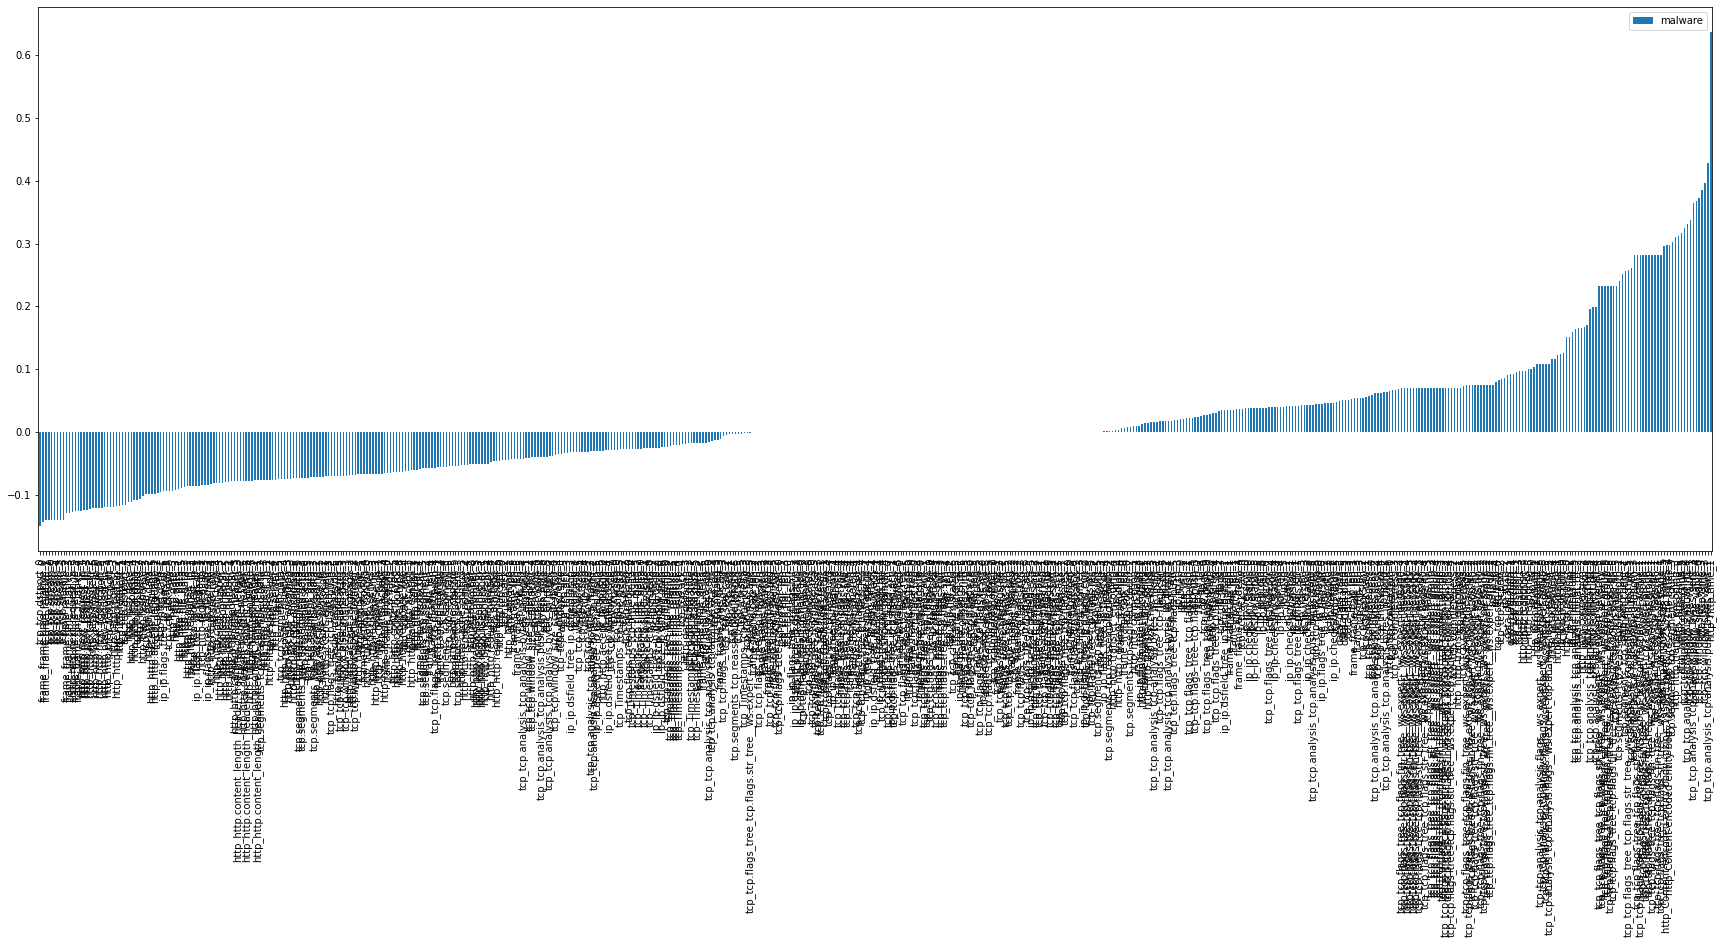

In [13]:
mixed_USNIF_corr_df.plot(kind="bar", figsize=(30,10))

In [14]:
filtered_mixed_Hancitor_corr_df = mixed_USNIF_corr_df[abs(mixed_USNIF_corr_df['malware']) > 0.1]
corr_good_fields = list(filtered_mixed_Hancitor_corr_df.T.columns) 
print(len(corr_good_fields))
corr_good_fields

98


['tcp_tcp.dstport_0',
 'frame_frame.time_relative_0',
 'frame_frame.time_relative_1',
 'tcp_tcp.stream_1',
 'tcp_tcp.stream_0',
 'tcp_tcp.stream_5',
 'tcp_tcp.stream_4',
 'tcp_tcp.stream_2',
 'tcp_tcp.stream_3',
 'frame_frame.time_relative_2',
 'frame_frame.time_relative_3',
 'http_http.next_request_in_3',
 'frame_frame.time_relative_5',
 'frame_frame.time_relative_4',
 'http_http.next_request_in_4',
 'http_http.next_request_in_1',
 'http_http.prev_request_in_3',
 'http_http.next_request_in_2',
 'http_http.request_5',
 'http_http.next_request_in_0',
 'http_http.next_request_in_5',
 'tcp_tcp.srcport_5',
 'http_http.prev_request_in_5',
 'http_http.prev_request_in_4',
 'tcp_tcp.srcport_3',
 'http_http.request_3',
 'http_http.prev_request_in_2',
 'http_http.request_1',
 'tcp_tcp.srcport_1',
 'tcp_tcp.dstport_4',
 'http_http.date_4',
 'http_http.response_4',
 'http_http.file_data_4',
 'tcp_tcp.dstport_2',
 'http_http.date_2',
 'http_http.response_2',
 'ip_ip.ttl_0',
 'ip_ip.checksum_1',
 'h

<AxesSubplot:>

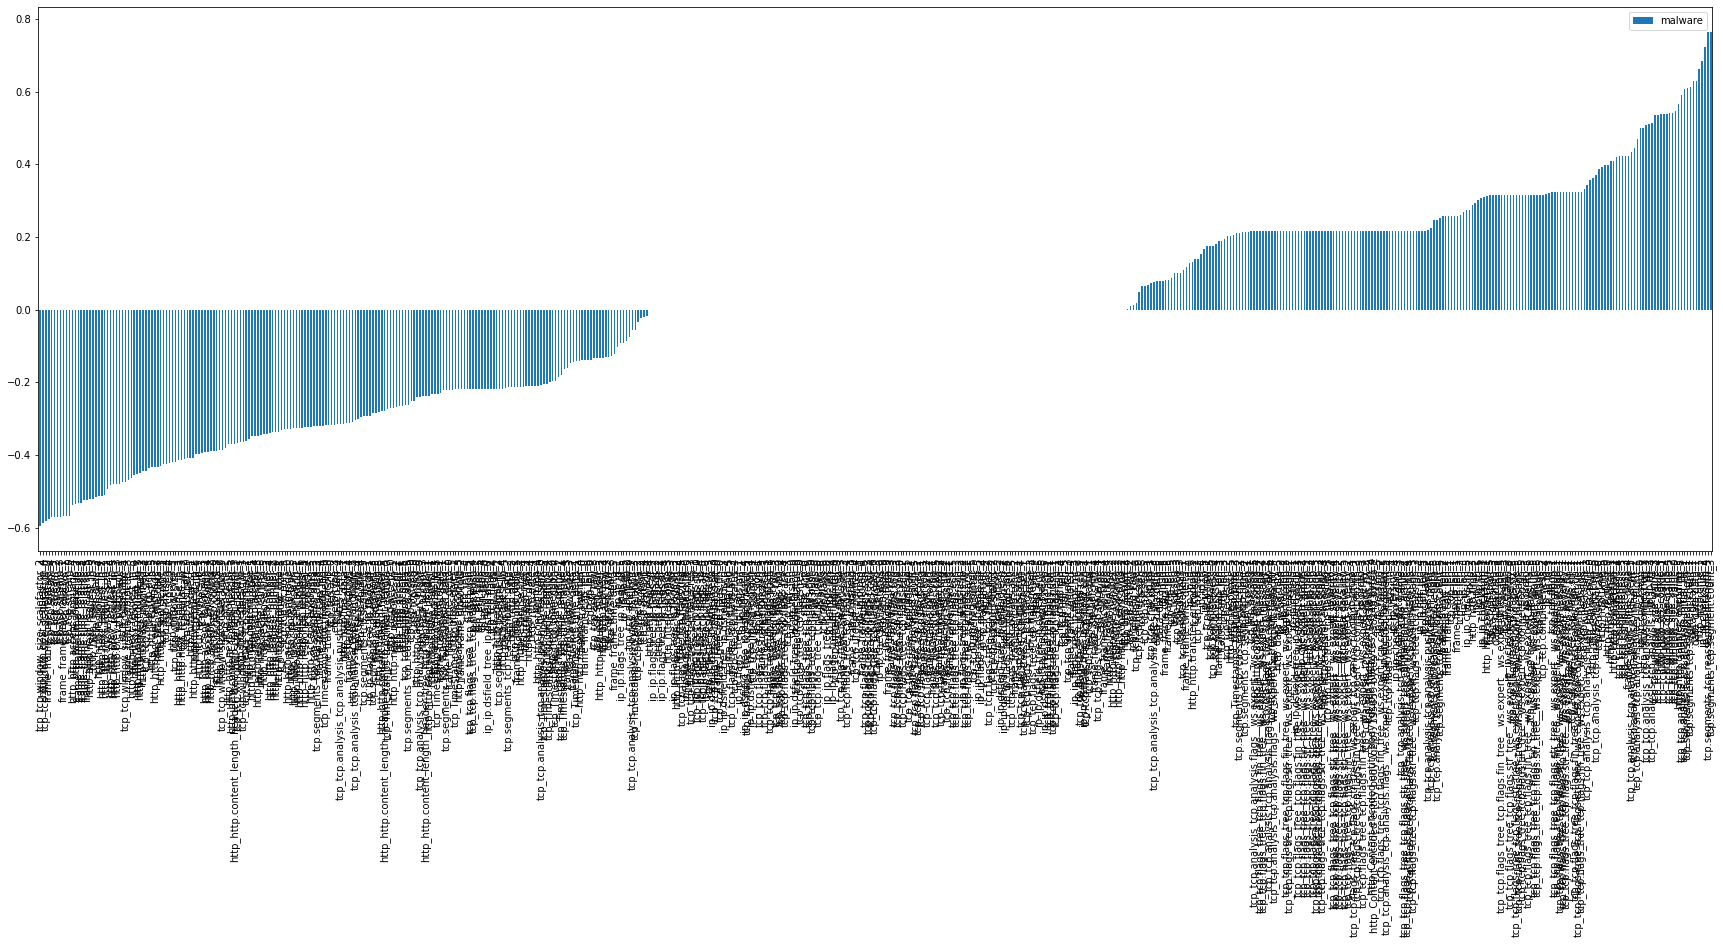

In [15]:
# one to one corr mixed_one_to_one_Hancitor_df
mixed_one_to_one_USNIF_corr_df = mixed_one_to_one_USNIF_corr_df.loc[['malware'],:].fillna(0).drop(['malware'], axis=1).T.sort_values(by = 'malware')
mixed_one_to_one_USNIF_corr_df.plot(kind="bar", figsize=(30,10))

In [16]:
mixed_one_to_one_USNIF_corr_df = mixed_one_to_one_USNIF_corr_df[abs(mixed_one_to_one_USNIF_corr_df['malware']) > 0.5]
corr_one_to_one_good_fields = list(mixed_one_to_one_USNIF_corr_df.T.columns) 
print(len(corr_one_to_one_good_fields))
corr_one_to_one_good_fields

48


['tcp_tcp.window_size_scalefactor_2',
 'http_http.next_request_in_4',
 'tcp_tcp.window_size_scalefactor_0',
 'frame_frame.time_relative_0',
 'tcp_tcp.stream_4',
 'tcp_tcp.stream_5',
 'tcp_tcp.stream_2',
 'tcp_tcp.stream_3',
 'frame_frame.time_relative_1',
 'tcp_tcp.stream_1',
 'tcp_tcp.stream_0',
 'http_http.accept_language_4',
 'http_http.response_in_2',
 'frame_frame.time_relative_2',
 'frame_frame.time_relative_3',
 'frame_frame.time_relative_4',
 'frame_frame.time_relative_5',
 'http_http.next_request_in_0',
 'http_http.request_in_3',
 'http_http.date_3',
 'http_http.response_in_4',
 'http_http.next_request_in_2',
 'http_http.next_request_in_1',
 'ip_ip.checksum_0',
 'http_http.connection_3',
 'tcp_tcp.analysis_tcp.analysis.initial_rtt_3',
 'ip_ip.ttl_3',
 'tcp_tcp.analysis_tcp.analysis.initial_rtt_4',
 'tcp_tcp.window_size_value_3',
 'tcp_tcp.window_size_value_4',
 'http_http.set_cookie_3',
 'tcp_tcp.window_size_value_1',
 'http_http.connection_4',
 'tcp_tcp.window_size_value_5',


# Use Fisher’s Score

In [17]:

def get_train_test_data(data_df, features_list, test_size, labels_list):
    #Set up train and test data
    #features_list = np.concatenate((full_attributes_list_np,full_categories_list_np,common_fields_list,open_hour_fields_list), axis=None)
    sc = StandardScaler()
    labels_list = labels_list
    X=data_df[features_list]
    #display("Before Change",X)
    sc.fit(X)
    X = sc.transform(X)
    #display("After Change",X[:,:5])
    #display(len(X))
    y=data_df[labels_list]
    if test_size == 0:
        return X,[],y,[]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=5)
    return X_train, X_test, y_train.to_numpy().flatten(), y_test.to_numpy().flatten()

def get_k_fold_data_set(data_df, features_list, num_splits, labels_list, shuffle=True, to_df=False):
    sc = StandardScaler()
    kf = KFold(n_splits=num_splits, shuffle=shuffle)
    train_test_set_list=[]
    X=data_df[features_list].drop(labels_list, axis=1).to_numpy()
    sc.fit(X)
    X = sc.transform(X)
    y=data_df[labels_list].to_numpy()
    for train_index, test_index in kf.split(X):
        data_train, data_test = X[train_index], X[test_index]
        label_train, label_test = y[train_index], y[test_index]
        if to_df:
            data_train=pd.DataFrame(data_train,columns=features_list)
            data_test=pd.DataFrame(data_test,columns=features_list)
        train_test_set_list.append([data_train, data_test,label_train.flatten(), label_test.flatten()])
    return train_test_set_list


In [18]:
# Do k-flod on malware record and normal record and mix them together, to make sure that trian and test both has the malware data
def k_fold_unmixed_malware_normal_record(local_malware_data_df, local_normal_data_df, features_list, num_splits, labels_list, oneToOne= False, shuffle=True, to_df=False):
    local_malware_k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(local_malware_data_df, features_list, num_splits, labels_list, shuffle, to_df)
    local_normal_k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(local_normal_data_df, features_list, num_splits, labels_list, shuffle, to_df)
    train_test_set_list= []
    for idx in range(len(local_malware_k_fold_train_test_all_data_set_list_list)):
        local_train_test_record = []
        if oneToOne:
            malware_train_len = len(local_malware_k_fold_train_test_all_data_set_list_list[idx][0])
            malware_test_len = len(local_malware_k_fold_train_test_all_data_set_list_list[idx][1])
            local_normal_k_fold_train_test_all_data_set_list_list[idx][0] = local_normal_k_fold_train_test_all_data_set_list_list[idx][0][: malware_train_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][1] = local_normal_k_fold_train_test_all_data_set_list_list[idx][1][: malware_test_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][2] = local_normal_k_fold_train_test_all_data_set_list_list[idx][2][: malware_train_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][3] = local_normal_k_fold_train_test_all_data_set_list_list[idx][3][: malware_test_len]

        for record_idx in range(4):
            local_train_test_record.append(np.concatenate((local_malware_k_fold_train_test_all_data_set_list_list[idx][record_idx], local_normal_k_fold_train_test_all_data_set_list_list[idx][record_idx])))
        train_random_idx = np.random.permutation(len(local_train_test_record[0]))
        test_random_idx = np.random.permutation(len(local_train_test_record[1]))
        local_train_test_record[0] = local_train_test_record[0][train_random_idx]
        local_train_test_record[1] = local_train_test_record[1][test_random_idx]
        local_train_test_record[2] = local_train_test_record[2][train_random_idx]
        local_train_test_record[3] = local_train_test_record[3][test_random_idx]
        train_test_set_list.append(local_train_test_record)
    return train_test_set_list


In [19]:
# mixed_Hancitor_df mixed mixed_one_to_one_Hancitor_df
k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(mixed_one_to_one_USNIF_df, list(mixed_one_to_one_USNIF_df.columns), 5, ['malware'])
len(k_fold_train_test_all_data_set_list_list)

5

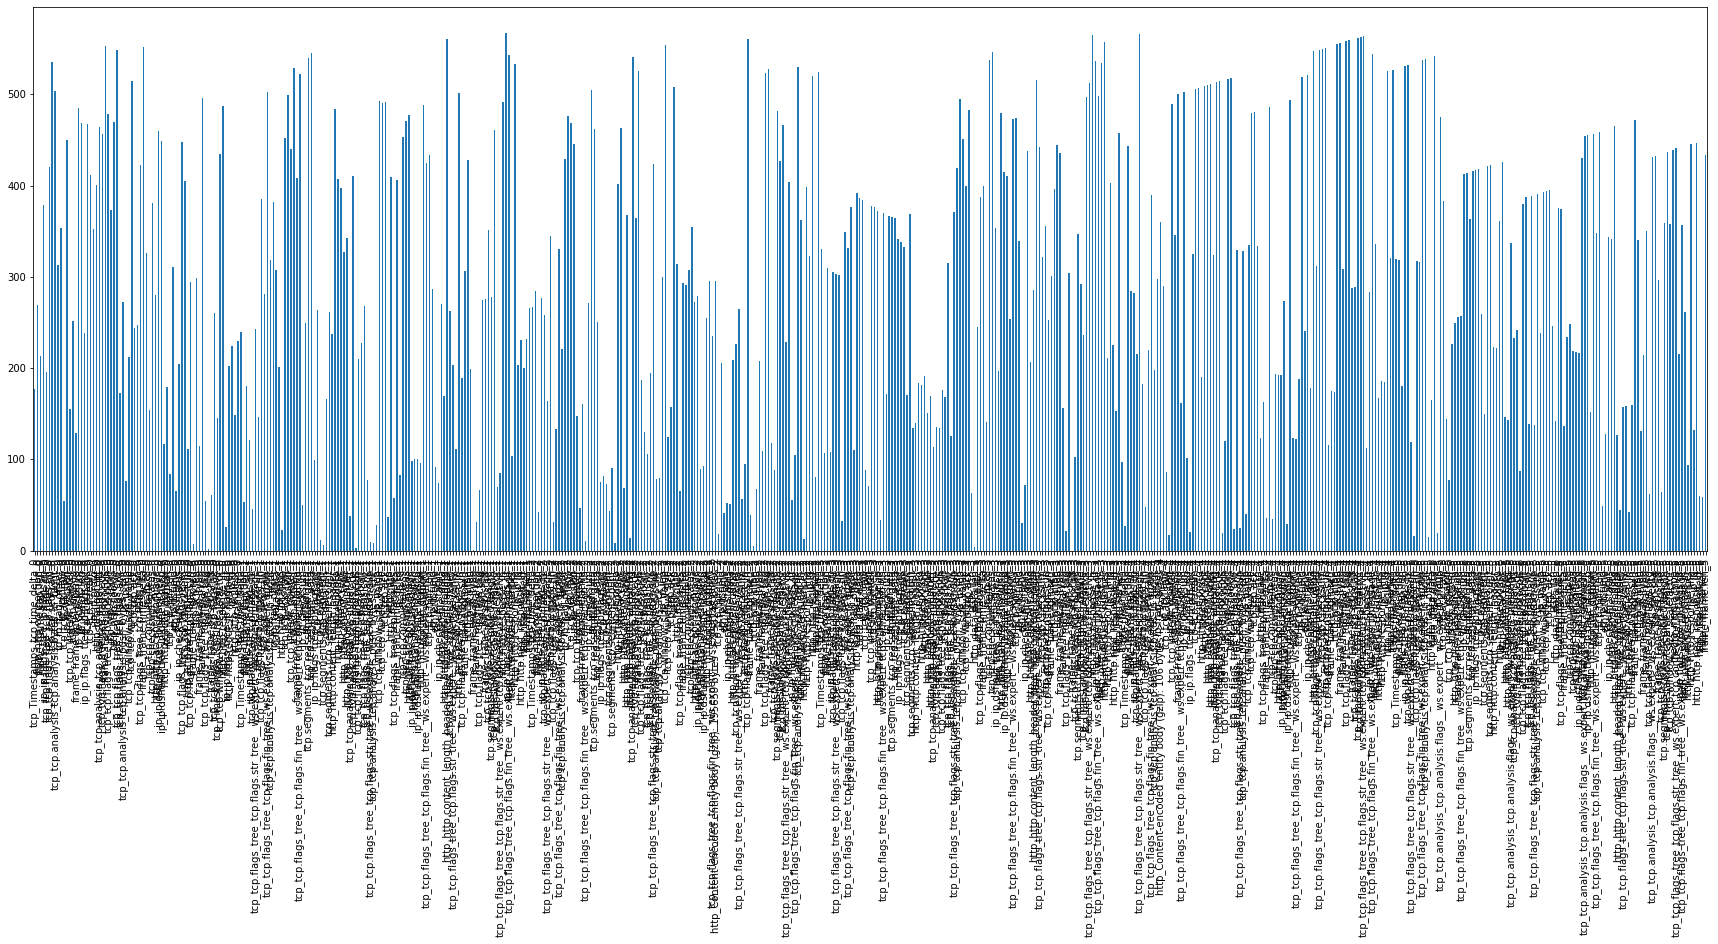

In [20]:
# Calculating scores 
score = fisher_score.fisher_score(k_fold_train_test_all_data_set_list_list[0][0], k_fold_train_test_all_data_set_list_list[0][2])
featrue_importances = pd.Series(score, mixed_one_to_one_USNIF_df.columns[0:len(mixed_one_to_one_USNIF_df.columns)-1])
featrue_importances.plot(kind="bar", figsize=(30,10))
plt.show()

In [21]:
featrue_importances_df = pd.DataFrame({'field':featrue_importances.index, 'score': featrue_importances.values})
featrue_importances_df = featrue_importances_df.sort_values(by='score', ascending=False)
featrue_importances_df

,field,score
160,ip_ip.flags_tree_ip.flags.df_1,567
375,tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expe...,566
359,http_http.response_in_3,565
451,tcp_tcp.flags_tree_tcp.flags.str_tree__ws.expe...,564
450,tcp_tcp.window_size_scalefactor_4,563
...,...,...
319,http_data_data.len_3,4
109,frame_frame.protocols_1,3
59,tcp_tcp.seq_0,2
149,frame_frame.encap_type_1,1


In [22]:
fisher_rank = fisher_score.fisher_score(k_fold_train_test_all_data_set_list_list[0][0], k_fold_train_test_all_data_set_list_list[0][2], mode='rank')
fisher_rank

array([177, 269, 213, 379, 196, 420, 535, 504, 313, 353,  55, 450, 155,
       252, 129, 485, 468, 239, 467, 412, 352, 401, 464, 456, 553, 478,
       373, 470, 548, 173, 272,  76, 212, 515, 244, 247, 423, 552, 326,
       154, 381, 280, 460, 449, 117, 179,  84, 311,  65, 205, 448, 405,
       112, 294,   7, 299, 115, 496,  54,   2,  61, 260, 145, 435, 487,
        26, 202, 224, 149, 230, 240,  53, 180, 121,  46, 243, 147, 385,
       281, 503, 318, 382, 307, 201,  23, 452, 499, 440, 529, 408, 522,
        50, 250, 540, 545,  99, 264,  12,   6, 166, 262, 237, 484, 407,
       397, 327, 343,  38, 410,   3, 210, 228, 268,  77,  10,   8,  28,
       493, 490, 492,  37, 409,  58, 406,  83, 453, 471, 477,  98, 100,
       101,  96, 488, 425, 434, 287,  92,  74, 270, 170, 561, 263, 203,
       111, 501, 189, 306, 428, 199,   1,  31,  67, 275, 276, 351, 278,
       461,  70,  85, 491, 567, 543, 104, 533, 204, 231, 200, 232, 266,
       267, 284,  42, 277, 258, 164, 345,  32, 133, 330, 221, 42

# Start to do SVM training

In [23]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, mean_squared_error

In [24]:
kernel_list=['rbf', 'poly', 'sigmoid']
param_grid = {'C': [1, 10, 25, 50, 100], 'gamma': [0.1, 0.05, 0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid'], 'degree':[3,9]}

In [25]:
def get_rt_model_score(model, train_test_data_set_list, allow_log=True):
    X,x,Y,y = train_test_data_set_list
    score_message_dict={}
    y_pred=model.predict(x)
    x_pred=model.predict(X)
    score_message_dict['accuracy_score'] = accuracy_score(y, y_pred)
    score_message_dict['precision_score'] = precision_score(y, y_pred,average='weighted')
    score_message_dict['recall_score'] = recall_score(y,y_pred,average='weighted')
    score_message_dict['f1_score'] = f1_score(y,y_pred,average='weighted')
    score_message_dict['train_rmse'] = np.sqrt(mean_squared_error(Y, x_pred))
    score_message_dict['test_rmse'] = np.sqrt(mean_squared_error(y, y_pred))

    if allow_log:
        print("Accuracy for Train set:",accuracy_score(Y, x_pred))
        print('accuracy_score: %.3f' % score_message_dict['accuracy_score'])
        print('precision_score: %.3f' % score_message_dict['precision_score'])
        print('recall_score: %.3f' % score_message_dict['recall_score'])
        print('f1_score: %.3f' % score_message_dict['f1_score'])
        print('train_rmse: %.3f' % score_message_dict['train_rmse'])
        print('test_rmse: %.3f' % score_message_dict['test_rmse'])
        print()

    return score_message_dict

def get_score(result_list, y, allow_log=True):
    score_message_dict={}
    score_message_dict['accuracy_score'] = accuracy_score(y, result_list)
    score_message_dict['precision_score'] = precision_score(y, result_list,average='weighted')
    score_message_dict['recall_score'] = recall_score(y,result_list,average='weighted')
    score_message_dict['f1_score'] = f1_score(y,result_list,average='weighted')
    score_message_dict['test_rmse'] = np.sqrt(mean_squared_error(y, result_list))

    if allow_log:
        print('accuracy_score: %.3f' % score_message_dict['accuracy_score'])
        print('precision_score: %.3f' % score_message_dict['precision_score'])
        print('recall_score: %.3f' % score_message_dict['recall_score'])
        print('f1_score: %.3f' % score_message_dict['f1_score'])
        print('test_rmse: %.3f' % score_message_dict['test_rmse'])
        print()

    return score_message_dict

In [26]:
def train_SVM(model,train_test_data_set_list):
    X,x,Y,y = train_test_data_set_list
    model.fit(X,Y)
    return model

### Let me start with Linear Kernel 

In [27]:
# get_k_fold_data_set(mixed_Hancitor_df, list(mixed_Hancitor_df.columns), 5, ['malware'])
train_test_data_set_list = list(get_train_test_data(mixed_one_to_one_USNIF_df, list(mixed_one_to_one_USNIF_df.columns), 0.2, ['malware']))
linear_SVM_clf = svm.SVC(kernel='linear')
linear_SVM_clf = train_SVM(linear_SVM_clf,train_test_data_set_list)
get_rt_model_score(linear_SVM_clf, train_test_data_set_list)

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000



{'accuracy_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0,
 'train_rmse': 0.0,
 'test_rmse': 0.0}

In [28]:
# with K fold k=5
score_list = []
for train_test_data_list in k_fold_train_test_all_data_set_list_list:
    linear_SVM_clf = svm.SVC(kernel='linear')
    linear_SVM_clf = train_SVM(linear_SVM_clf,train_test_data_list)
    score_list.append(get_rt_model_score(linear_SVM_clf, train_test_data_list))

Accuracy for Train set: 1.0
accuracy_score: 0.800
precision_score: 0.850
recall_score: 0.800
f1_score: 0.781
train_rmse: 0.000
test_rmse: 0.447

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000



# Free Space

In [ ]:
for t in k_fold_train_test_all_data_set_list_list[0][0]:
    print(t[84])

In [ ]:
k_fold_train_test_all_data_set_list_list[0][2]

In [ ]:
#IcedId_raw_data_df IcedId_noraml_raw_data_df
for idx in range(len(list(IcedId_noraml_raw_data_df.columns))):
    if list(IcedId_raw_data_df.columns)[idx] == 'IcedIdCookie_0':
        print(idx)